In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
import seaborn as sns
import os.path as path
import os
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt # graphs plotting
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline
import numpy
import csv 

from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

import statistics

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

# for Arial typefont
matplotlib.rcParams['font.family'] = 'Arial'


## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("Packages imported")

Packages imported


In [2]:
# https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4/data

# read_path = "C:/Users/sali85/Desktop/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv"
read_path = "E:/RA/Death Classification/Dataset/IoT_data.csv"

dataset_full = []
# host_names_ne = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        dataset_full.append(tmp)
    


In [3]:
dataset_final = []
for i in range(len(dataset_full)):
    aa = dataset_full[i]
    tmp = []
    for j in range(len(aa)-1):
        tmp.append(float(aa[j]))
    tmp.append(int(aa[len(aa)-1]))
    dataset_final.append(tmp)

In [4]:
# dataset_reduced = []
# for i in range(1,len(dataset_full)):
#     tmp = dataset_full[i]
#     if tmp[0]!="NA" and tmp[1]!="NA" and tmp[2]!="NA" and tmp[3]!="NA" and tmp[4]!="NA" and tmp[5]!="NA" and tmp[6]!="NA" and tmp[7]!="NA" and tmp[8]!="NA" and tmp[9]!="NA" and tmp[10]!="NA" and tmp[11]!="NA" and tmp[12]!="NA" and tmp[13]!="NA" and tmp[14]!="NA" and tmp[15]!="NA" and tmp[16]!="NA" and tmp[17]!="NA" and tmp[18]!="NA":
#         if tmp[0]!="" and tmp[1]!="" and tmp[2]!="" and tmp[3]!="" and tmp[4]!="" and tmp[5]!="" and tmp[6]!="" and tmp[7]!="" and tmp[8]!="" and tmp[9]!="" and tmp[10]!="" and tmp[11]!="" and tmp[12]!="" and tmp[13]!="" and tmp[14]!="" and tmp[15]!="" and tmp[16]!="" and tmp[17]!="" and tmp[18]!="":
#             dataset_reduced.append(tmp)
        
        
        
        

In [10]:
X1 = []
y1 = []
for i in range(len(dataset_final)):
    aa = dataset_final[i]
    X1.append(aa[0:18])
    y1.append(aa[18])

In [13]:
X = np.array(X1)
y = np.array(y1)

In [30]:
np.save("E:/RA/Death Classification/Dataset/clinical_data_2_608_patients.npy",X)
np.save("E:/RA/Death Classification/Dataset/clinical_data_2_608_patients_attributes.npy",y)

# classification with LightGBM

In [14]:
# https://slundberg.github.io/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20LightGBM.html
# !pip install lightgbm
# !pip install shap
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
# X = np.array(attributes)
# y =  np.array(labels_int)
# X_orig = np.array(attributes)


In [15]:
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [16]:
len(X),len(y),len(X_train),len(X_test)

(608, 608, 425, 183)

In [17]:
idx = pd.Index(y) # creates an index which allows counting the entries easily
print('Here are all of the viral species in the dataset: \n', len(idx),"entries in total")
aq = (idx.value_counts())
print(aq)

Here are all of the viral species in the dataset: 
 608 entries in total
0    524
1     84
dtype: int64


In [18]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [19]:
np.unique(y_train)

array([0, 1])

# Train the model

In [24]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt", #GradientBoostingDecisionTree
    "objective": "binary", # "multiclass" for Multi-class target feature, "binary" for binary
    "metric": "binary_logloss", # "multi_logloss" for metric for multi-class, "binary_logloss" for binary
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    'num_class': 1, #no.of unique values in the target class not inclusive of the end value
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.289166


# Explain predictions

In [25]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


# Visualize a single prediction

In [26]:
X_display = pd.DataFrame(X)
# len(X[0])
# X_display.columns =["case_month","res_state","state_fips_code","res_county","county_fips_code","age_group","sex","race","ethnicity","case_positive_specimen_interval","case_onset_interval","process","exposure_yn","current_status","symptom_status","hosp_yn","icu_yn","underlying_conditions_yn"]
X_display.columns =["Red blood Cells", "Hemoglobin", "Platelets", "Hematocrit", "Aspartate transaminase","Lymphocytes", "Monocytes", "Sodium", "Urea", "Basophils", "Creatinine", "Serum Glucose","Alanine transaminase", "Leukocytes", "Potassium", "Eosinophils", "Proteina C reativamg/dL", "Neutrophils"]


In [27]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_display.iloc[0,:])


In [28]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X_display.iloc[:1000,:])


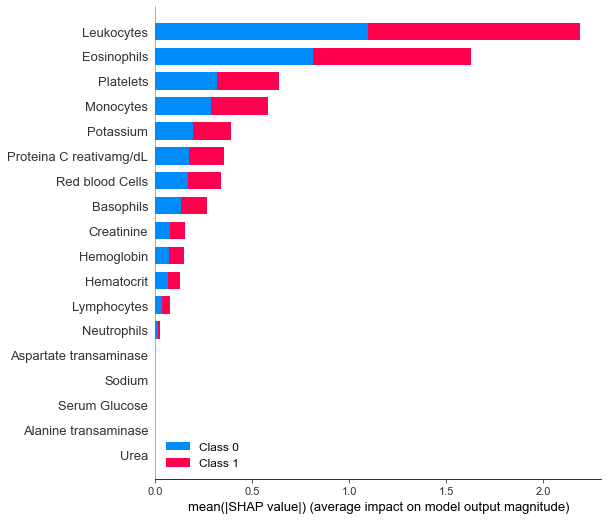

In [29]:
shap.summary_plot(shap_values, X_display)